# Arbol de decisión
## Lectura de datos

In [2]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('diabetes.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1]
atributoClase=setInicial.columns[-1]
print(atributoClase)
print(atributosName)

#Datos de los atributos
dataGral=setInicial[atributosName]

#Datos de la clase (vector de elementos reales)
claseGral=setInicial[atributoClase]

#Instancias por clase
print(claseGral.value_counts())


class
Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
class
tested_negative    500
tested_positive    268
Name: count, dtype: int64


## Generar un solo modelo
Entrenamiento

|--- plas <= 127.50
|   |--- age <= 28.50
|   |   |--- mass <= 30.95
|   |   |   |--- class: tested_negative
|   |   |--- mass >  30.95
|   |   |   |--- class: tested_negative
|   |--- age >  28.50
|   |   |--- mass <= 26.35
|   |   |   |--- class: tested_negative
|   |   |--- mass >  26.35
|   |   |   |--- class: tested_negative
|--- plas >  127.50
|   |--- mass <= 29.95
|   |   |--- plas <= 145.50
|   |   |   |--- class: tested_negative
|   |   |--- plas >  145.50
|   |   |   |--- class: tested_positive
|   |--- mass >  29.95
|   |   |--- plas <= 157.50
|   |   |   |--- class: tested_positive
|   |   |--- plas >  157.50
|   |   |   |--- class: tested_positive



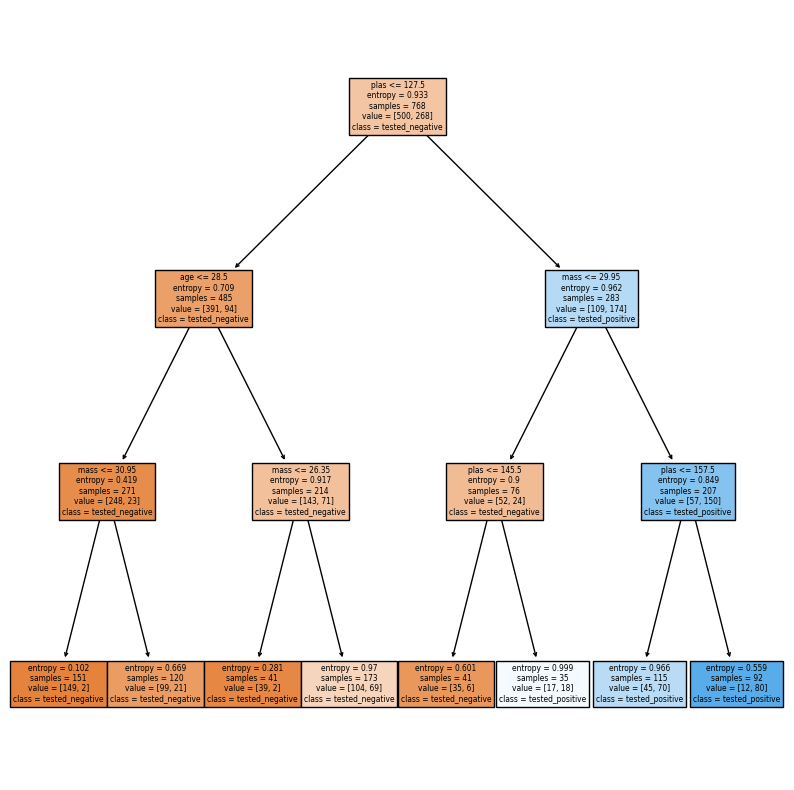

In [4]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=3)

################## Modelo ###########################
modelo = clasificador.fit(dataGral, claseGral)

from sklearn.tree import export_text

arbol = export_text(modelo, feature_names=atributosName.to_list())
print(arbol)



import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=atributosName.to_list(),class_names=['tested_negative','tested_positive'],filled=True)#, rounded=True)
plt.show()

Clasificación (predicción)

In [5]:
setPredic=pd.DataFrame({'preg':[1,3,7],
           'plas':[138,191,150],
           'pres':[90,68,66],
           'skin':[30,15,42],
           'insu':[150,130,342],
           'mass':[37.6,30.9,34.7],
            'pedi':[0.651,0.299,0.718],
           'age':[35,34,42]})

#Instancias por clase
print(setPredic)

   preg  plas  pres  skin  insu  mass   pedi  age
0     1   138    90    30   150  37.6  0.651   35
1     3   191    68    15   130  30.9  0.299   34
2     7   150    66    42   342  34.7  0.718   42


In [6]:
#Asignar clase
Clases=modelo.predict(setPredic)
print(Clases)

['tested_positive' 'tested_positive' 'tested_positive']


In [7]:
predictExp2=modelo.predict(dataGral)
predictExp2

print(len(claseGral), len(predictExp2))

Aciertos=0
for x in range(len(claseGral)):
    if claseGral[x]==predictExp2[x]:
        Aciertos+=1

print(Aciertos, len(claseGral)-Aciertos)

768 768
594 174


## Separación de conjuntos
Entrenamiento

In [11]:
from sklearn.model_selection import train_test_split

#Separar los datos
valoresTrain, valoresTest, clasesTrain, clasesTest= \
train_test_split(dataGral, claseGral, test_size=0.30)

print(len(valoresTrain), len(valoresTest))

valoresTrain.head()


537 231


,preg,plas,pres,skin,insu,mass,pedi,age
169,8,118,72,19,0,23.1,1.476,46
475,1,136,74,50,204,37.4,0.399,24
738,2,106,64,35,119,30.5,1.400,34
289,0,118,84,47,230,45.8,0.551,31
42,8,112,72,0,0,23.6,0.840,58


Clasificación (evaluación)

In [16]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy')

################## Modelo ###########################
modelo = clasificador.fit(valoresTrain, clasesTrain)

predict = modelo.predict(valoresTest)
predictTrain=modelo.predict(valoresTrain)

print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.645021645021645
Conjunto de entrenamiento:  1.0


In [ ]:
%%shell
jupyter nbconvert --to html 2_1_Arbol.ipynb

[NbConvertApp] Converting notebook 2_1_Arbol.ipynb to html
[NbConvertApp] Writing 913065 bytes to 2_1_Arbol.html
